<a href="https://colab.research.google.com/github/bartala/Bankkruptcy/blob/main/CollectTweets(NewBIUBankruptcy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://dev.to/twitterdev/a-comprehensive-guide-for-using-the-twitter-api-v2-using-tweepy-in-python-15d9
! pip3 install tweepy --upgrade
! pip3 install git+https://github.com/yhat/ggplot.git

In [2]:
# App name ADSResearcher
import tweepy

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import datetime
from time import gmtime, strftime
import subprocess
import time
import os, os.path
import math
import threading
import json
import gzip
import sys
import calendar
import re
from pathlib import Path
import json
import ast
from plotnine import *

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
PTH = '/content/drive/MyDrive/Colab Notebooks/BIU_HEB/'

## Download tweets

In [6]:
keys = pd.read_csv(os.path.join(PTH,'code','TwitterKeys.csv'))

In [7]:
# Twitter API V2 
# APP: ADSResearcher

consumer_key = keys['value'].iloc[0]
consumer_secret= keys['value'].iloc[1]
access_token = keys['value'].iloc[2]
access_token_secret = keys['value'].iloc[3]

client = tweepy.Client(bearer_token= keys['value'].iloc[4],wait_on_rate_limit=True)

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
df = pd.read_csv(os.path.join(PTH,'data','crashed_stocks','stock_crash.csv'))
user_names = df['Twitter_handle']
user_names

In [20]:
user_ids  = []
for user in user_names:
  user1 = api.get_user(screen_name=user)
  followers_count = user1.followers_count
  following_count = user1.friends_count
  user_ids.append([user1.id_str, user, user1.listed_count,followers_count,following_count]) # # [user_id, user_name,number of lists a user is on]

In [ ]:
df_users = pd.DataFrame(user_ids)
df_users.columns = ['userid','username','lists','followers','following']
df_users

In [11]:
def collect_tweets(company_user_name, S, E, fname):
  print(company_user_name)
  filename = os.path.join(PTH,'data',fname+'_'+company_user_name+'.json.gz')
  print(filename)
  for tweet in tweepy.Paginator(client.search_all_tweets, 
                        query= '@'+ company_user_name +' lang:en',
                        start_time= S,
                        end_time = E,
                        expansions = ['author_id','referenced_tweets.id','referenced_tweets.id.author_id','in_reply_to_user_id','attachments.media_keys','entities.mentions.username'],
                        tweet_fields=['id','text','author_id','created_at','conversation_id','entities','public_metrics','referenced_tweets'],
                        user_fields=['id','name','username','created_at','description','public_metrics','verified'],
                        place_fields=['full_name','id'],
                        media_fields=['type','url','alt_text','public_metrics'],
                        max_results=100).flatten():
    with gzip.open(filename, 'a') as fout:
          fout.write(json.dumps(tweet.data).encode('utf-8'))
          fout.write('\n'.encode('utf-8'))

### collect tweets for companies that declared bankruptcy

In [22]:
# Make sure to set the spreadsheet as public

sheet_id = '1iXJlaMYkccWMnIYB07GNJQS_aN9wPfdPwE5KixaefEo'
sheet_name = "All_chapter_11"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url,header=[0])
df

,Company Name,Bankruptcy Year,Twitter Username,Stock ID,UserID,Company Type,Private/Public,Did we cover?,Twitter Followers,Twitter Following,helving_time,Avg_Google_Trends,before_start,before_end,after_start,after_end,Date of Bankruptcy,Twitter Lists,Current Status
0,Aeroméxico,2020,Aeromexico,NaN,5.050569e+07,commertial flights,Public,0.0,1865990.0,230573.0,NaN,55.90,2019-05-30T00:00:00Z,2020-06-29T00:00:00Z,2020-06-30T00:00:00Z,2020-07-30T00:00:00Z,"June 30, 2020",2563.0,NaN
1,Akorn,2020,AKORN_FA,NaN,2.964785e+09,NaN,Public,0.0,261.0,293.0,No tweets a month before the announcment,0.00,2020-04-20T00:00:00Z,2020-05-19T00:00:00Z,2020-05-20T00:00:00Z,2020-06-20T00:00:00Z,"May 20, 2020",10.0,NaN
2,American Greetings,2020,amgreetings,NaN,1.754040e+07,NaN,Public,0.0,16290.0,1420.0,NaN,0.00,2020-03-16T00:00:00Z,2020-04-15T00:00:00Z,2020-04-16T00:00:00Z,2020-05-16T00:00:00Z,"April 16, 2020",333.0,NaN
3,Ascena Retail Group,2020,ascenaofficial,NaN,NaN,NaN,Public,0.0,20.0,0.0,no tweets,NaN,2020-06-23T00:00:00Z,2020-07-22T00:00:00Z,2020-07-23T00:00:00Z,2020-08-23T00:00:00Z,"July 23, 2020",0.0,NaN
4,Avianca,2020,Avianca,NaN,2.740878e+08,NaN,Public,0.0,932725.0,24332.0,NaN,19.03,2020-04-10T00:00:00Z,2020-05-09T00:00:00Z,2020-05-10T00:00:00Z,2020-06-10T00:00:00Z,"May 10, 2020",1469.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,Overseas Shipholding Group,2012,NaN,NaN,NaN,NaN,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,ECOtality,2013,NaN,NaN,NaN,NaN,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,Exide,2013,NaN,NaN,NaN,NaN,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,GateHouse Media,2013,NaN,NaN,NaN,NaN,Public,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 1 month after and before

# mentiones of a company 1 month after it filed for bankruptcy
companies_before = df[['Twitter Username', 'before_start', 'before_end']]

# mentiones of the company 1 month before it filed for bankruptcy
companies_after = df[['Twitter Username', 'after_start', 'after_end']]

In [ ]:
# collect tweets and write to file
for i in range(0, len(companies_after)):
  collect_tweets(companies_after.iloc[i]['Twitter Username'],
                 companies_after.iloc[i]['after_start'], 
                 companies_after.iloc[i]['after_end'],
                 'after'
                 )
  time.sleep(7)

### collect tweets for companies that their stocks crashed but did not declate bankruptcy

In [ ]:
# collect tweets and write to file
for i in range(0, len(df)):
  collect_tweets(df.iloc[i]['Twitter_handle'],
                 df.iloc[i]['Twitter_start_date'], 
                 df.iloc[i]['Twitter_end_date'],
                 'crashed_stocks/before'
                 )
  time.sleep(7)

AmericanAir
/content/drive/MyDrive/Colab Notebooks/BIU_HEB/data/crashed_stocks/before_AmericanAir.json.gz


### combine tweets

In [ ]:
PTH ='/content/drive/MyDrive/Colab Notebooks/BIU_HEB/data/All_chapter11_2020'

In [ ]:
companies = [
              'Aeromexico',
              'amgreetings',
              'Avianca',
              'BriggsStratton',
              'chesapeake',
              'DAVIDsTEA',
              'ExideCare',
              'AskFrontier',
              'GarrettMotion',
              'Gordmans',
              'INTELSAT',
              'LATAMAirlines',
              'LSC_COM_',
              'MNK',
              'mcclatchy',
              'McDermott_News',
              'MoodMedia',
              'nyandcompany',
              'PREIT',
              'SeadrillLtd',
              'ShopStageStores',
              'TailorBrands',
              'TuesdayMorning',
              ]

In [ ]:
# read the zipped file into a dataframe
df = pd.DataFrame()

for company in companies:
  print(company)
  tmp = pd.read_json(os.path.join(PTH,'before_'+company+'.json.gz'), compression='gzip',lines=True)
  tmp['company'] = company
  df = pd.concat([df, tmp], ignore_index=True)

df.to_csv(os.path.join(PTH,'before_all_2020.csv'), index=False)
del df

Aeromexico
amgreetings
Avianca
BriggsStratton
chesapeake
DAVIDsTEA
ExideCare
AskFrontier
GarrettMotion
Gordmans
INTELSAT
LATAMAirlines
LSC_COM_
MNK
mcclatchy
McDermott_News
MoodMedia
nyandcompany
PREIT
SeadrillLtd
ShopStageStores
TailorBrands
TuesdayMorning


In [ ]:
df = pd.DataFrame()
for company in companies:
  tmp = pd.read_json(os.path.join(PTH,'after_'+company+'.json.gz'), compression='gzip',lines=True)
  tmp['company'] = company
  df = pd.concat([df, tmp], ignore_index=True)

df.to_csv(os.path.join(PTH,'after_all_2020.csv'),index=False)

## Build the post-reply social network

In [ ]:
PTH ='/content/drive/MyDrive/Colab Notebooks/BIU_HEB/data/All_chapter11_2020'

In [ ]:
## functions

# casting to string
def read_tweets(filename):
  df = pd.read_csv(filename)
  df.loc[~df['in_reply_to_user_id'].isna(), 'in_reply_to_user_id'] = df.loc[~df['in_reply_to_user_id'].isna(),'in_reply_to_user_id'].astype(int).astype(str)
  df['author_id'] = df['author_id'].astype(str)
  return(df)


# REply edges (in the format of from-to edges)
def get_reply_edges(df):
  edges_reply = df[~df['in_reply_to_user_id'].isnull()][['author_id', 'in_reply_to_user_id','company']]
  edges_reply['Edge_type'] = "RE"
  edges_reply.columns = ["form","To","Company","Edge_type"]
  return(edges_reply)


# get the ids of mentioned users (RT or Mention)
def get_MT_TR_edges(df):
  edges_MT_RT = []
  tmp = []

  for i in range(len(df['entities'])):
    TweetType = "MT"
    row = df.iloc[i]['entities']
    if type(row)!=float:
      if 'mentions' in row:
        row = ast.literal_eval(row)
        if df.iloc[i]['text'].startswith("RT"):
          TweetType = 'RT'
        tmp =  [ [x['id'],df.iloc[i]['author_id'], df.iloc[i]['company'],TweetType] for x in row['mentions']] 
        for x in tmp:
          edges_MT_RT.append(x)

  return(edges_MT_RT)


# group by [From],[To],[Company]
def create_weighted_edges(df):
  df = (df.groupby(['From', 'To', 'Company']).size()
                                            .sort_values(ascending=False)
                                            .reset_index(name='count') 
                                            .drop_duplicates(subset='To')
                    )
  return(df)

In [ ]:
# load the data
df_before = read_tweets(os.path.join(PTH,'before_all_2020.csv'))

df_after = read_tweets(os.path.join(PTH,'after_all_2020.csv'))

In [ ]:
# create reply edges
edges_reply_before = get_reply_edges(df_before)

edges_reply_after = get_reply_edges(df_after)

In [ ]:
edges_MT_RT_before = get_MT_TR_edges(df_before)
edges_MT_RT_before = pd.DataFrame(edges_MT_RT_before)
edges_MT_RT_before.columns = ["From","To","Company","Edge_type"]

edges_MT_RT_after = get_MT_TR_edges(df_after)
edges_MT_RT_after = pd.DataFrame(edges_MT_RT_after)
edges_MT_RT_after.columns = ["From","To","Company","Edge_type"]

In [ ]:
activity_edges_before = edges_reply_before.append( edges_MT_RT_before )

activity_edges_after = edges_reply_after.append( edges_MT_RT_after )

In [ ]:
# group by [From],[To],[Company]
activity_edges_before = create_weighted_edges(activity_edges_before)
# save to file
activity_edges_before.to_csv(os.path.join(PTH,'activity_edges_before_All_chapter11_2020.csv'), index = False)


# group by [From],[To],[Company]
activity_edges_before = create_weighted_edges(activity_edges_after)
# save to file
activity_edges_before.to_csv(os.path.join(PTH,'activity_edges_after_All_chapter11_2020.csv'), index = False)

###  Statistics for BEFORE bankruptcy announcement

In [ ]:
PTH ='/content/drive/MyDrive/Colab Notebooks/BIU_HEB/data/All_chapter11_2020'

In [ ]:
# read the activity (RT, MT, RE) edges
activity_edges_before = pd.read_csv(os.path.join(PTH,'activity_edges_before_All_chapter11_2020.csv'))

activity_edges_after = pd.read_csv(os.path.join(PTH,'activity_edges_after_All_chapter11_2020.csv'))

In [ ]:
# number of companies
def num_companies(df):
  print(set(df['Company']))
  print(len(set(df['Company'])))


num_companies(activity_edges_before)

num_companies(activity_edges_after)

{'LATAMAirlines', 'ExideCare', 'DAVIDsTEA', 'Avianca', 'McDermott_News', 'BriggsStratton', 'Aeromexico', 'LSC_COM_', 'nyandcompany', 'SeadrillLtd', 'ShopStageStores', 'PREIT', 'MNK', 'TailorBrands', 'mcclatchy', 'Gordmans', 'MoodMedia', 'GarrettMotion', 'AskFrontier', 'chesapeake', 'INTELSAT', 'TuesdayMorning', 'amgreetings'}
23
{'LATAMAirlines', 'ExideCare', 'DAVIDsTEA', 'Avianca', 'McDermott_News', 'BriggsStratton', 'Aeromexico', 'LSC_COM_', 'nyandcompany', 'SeadrillLtd', 'ShopStageStores', 'PREIT', 'MNK', 'TailorBrands', 'mcclatchy', 'Gordmans', 'MoodMedia', 'GarrettMotion', 'AskFrontier', 'chesapeake', 'INTELSAT', 'TuesdayMorning', 'amgreetings'}
23


In [ ]:
# number of unique users per Company BEFORE bankruptcy announcement

def plot_me(df):
    x_axis = []
    y_axis = []

    for comp in set(df['Company']):
      sub_df = df[df['Company'] == comp]
      y_axis.append(len(set(sub_df['From'].tolist() + sub_df['To'].tolist())) )
      x_axis.append(comp)

    g = pd.DataFrame({"Company":x_axis, "y":y_axis})
    return(g)

In [ ]:
df_bar_before = plot_me(activity_edges_before)

df_bar_after = plot_me(activity_edges_after)

In [ ]:
df_bar_after['before'] = df_bar_before['y']
df_all = df_bar_after
df_all.columns =['Company','After','Before']

del df_bar_after

In [ ]:
df_all

,Company,After,Before
0,LATAMAirlines,464,320
1,ExideCare,399,134
2,DAVIDsTEA,487,415
3,Avianca,602,646
4,McDermott_News,54,35
5,BriggsStratton,108,102
6,Aeromexico,414,7642
7,LSC_COM_,9,5
8,nyandcompany,284,111
9,SeadrillLtd,4,13


Plot using R

In [ ]:
%load_ext rpy2.ipython

# https://www.askpython.com/python/examples/use-r-and-python-in-the-same-notebook#:~:text=Using%20R%20along%20with%20Python%20in%20Google%20Colab&text=To%20use%20R%20and%20python%20simultaneously%20in%20the%20same%20notebook,activate%20the%20rpy2%20package%20first.&text=rpy2%20is%20a%20high%2Dlevel,NumPy%20and%20pandas%20data%20structures.

In [ ]:
%%R
install.packages('reshape2',repos = "http://cran.us.r-project.org")

In [ ]:
%%R
library('ggplot2')
library('reshape2')

In [ ]:
# move pyton object to R
%R -i df_all

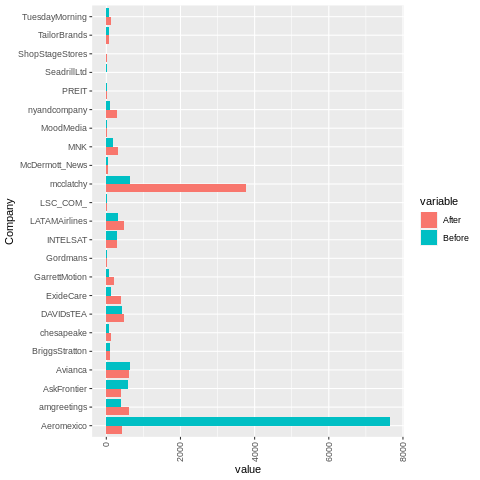

In [ ]:
%%R

df_all <- melt(df_all, id.vars='Company')

ggplot(df_all, aes(x=Company, y=value, fill=variable)) +
    geom_bar(stat='identity', position='dodge') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    coord_flip()

## Get followers ids of a user

In [ ]:
# load data
PTH ='/content/drive/MyDrive/Colab Notebooks/BIU_HEB/data/All_chapter11_2020'

activity_edges_before = pd.read_csv(os.path.join(PTH,'activity_edges_before_All_chapter11_2020.csv'))

activity_edges_after = pd.read_csv(os.path.join(PTH,'activity_edges_after_All_chapter11_2020.csv'))

In [ ]:
all_users_activity_edges = list(set(
  activity_edges_after['From'].tolist() + activity_edges_after['To'].tolist() +
  activity_edges_before['From'].tolist() + activity_edges_before['To'].tolist()
))

In [ ]:

follower_list = []

for user in all_users_activity_edges:
    print(user)
    followers = []
    try:
        for page in tweepy.Cursor(api.get_follower_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
            follower_list.append(followers)
    except tweepy.errors.TweepyException:
        print("error")
        continue
    follower_list = pd.DataFrame(follower_list[0])
    follower_list.to_csv(os.path.join('/content/drive/MyDrive/Colab Notebooks/BIU_HEB/data/All_chapter11_2020/followers',str(user)+'.csv'))

777999138864496640
1206
868871804831531008
5000
7018
875637231112683522
4994
964650094686502912
790
1265471809828290564
20
830075628183486464
error
859141161105096710
error
1604714503
4352
973732153887424512
error
908267811390226432
70
793024367227699201
757
973732153887424514


26
140509196
356
908496858569375749
14
3105882127
992
245628946
18
479985705
4761
240779305
186
259784760
4445
2153119800
85
234225722
17
898236474
276
521797692
85
42467395
246
776259451284295680
799
50200655
692
485884004


2180
624296036
76
2901803110
2391
2786721901
5000
10000
14862
45744244
221
30670965
1096
82706551
5000
10000
15000
20000
25000
30000


35000
40000
45000
50000
55000
60000
65000
70000
73756
901559453182451712
179
2348810371
3
150732943
5000
10000
15000
20000


25000
30000
34415
87818409
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000


65000
